# Tugas Akhir

__Prediksi Rate Of Penetration Pada Sumur Pemboran Pertamina Menggunakan Jaringan Saraf Tiruan Propagasi Balik__

Author: anisagmla@gmail.com

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [2]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Data')

data = pd.read_excel('datapertamina.xlsx')
data = data.drop(labels = data.columns[14:], axis=1)
data

,CHECK,TYPE WELL,Besar Lubang,DATETIME,MDEPTH (M),MTVD (M),WOB (Ton),HKLD (Ton),RPM,SCFM,MFI (GPM),SPP (Psi),MWI (sg),ROP1 (min/M)
0,12,A1,36,2014-06-26 00:00:00,12.0,12.000000,3.1,26.0,40,0,447,45,1.00,1.0
1,13,A1,36,2014-06-26 19:27:10,13.0,13.000000,3.2,26.0,39,0,441,45,1.00,1.4
2,14,A1,36,2014-06-26 19:32:36,14.0,14.000000,3.1,25.8,39,0,447,45,1.00,5.4
3,15,A1,36,2014-06-26 19:37:01,15.0,15.000000,2.9,26.2,40,0,444,50,1.00,4.4
4,16,A1,36,2014-06-26 19:42:46,16.0,16.000000,2.8,25.8,39,0,444,50,1.00,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,2999,C1,9875,2013-12-24 06:26:16,2999.0,2568.258204,10.5,98.5,84,1600,908,2230,8.33,8.1
8620,3000,C1,9875,2013-12-24 06:40:35,3000.0,2569.041681,11.5,97.5,84,1600,971,2143,8.33,14.3
8621,3001,C1,9875,2013-12-24 06:52:24,3001.0,2569.825157,11.5,97.5,84,1600,865,2298,8.33,11.8
8622,3002,C1,9875,2013-12-24 07:01:28,3002.0,2570.608634,6.0,103.0,71,1600,889,2199,8.33,9.1


## Exploratory Data Analysis (EDA)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CHECK         8624 non-null   int64         
 1   TYPE WELL     8624 non-null   object        
 2   Besar Lubang  8620 non-null   object        
 3   DATETIME      8624 non-null   datetime64[ns]
 4   MDEPTH (M)    8624 non-null   float64       
 5   MTVD (M)      8624 non-null   float64       
 6   WOB (Ton)     8624 non-null   float64       
 7   HKLD (Ton)    8624 non-null   float64       
 8   RPM           8624 non-null   int64         
 9   SCFM          8624 non-null   int64         
 10  MFI (GPM)     8624 non-null   int64         
 11  SPP (Psi)     8624 non-null   int64         
 12  MWI  (sg)     8624 non-null   float64       
 13  ROP1 (min/M)  8624 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 943.4+ KB
None


In [10]:
data.describe()

,CHECK,MDEPTH (M),MTVD (M),WOB (Ton),HKLD (Ton),RPM,SCFM,MFI (GPM),SPP (Psi),MWI (sg),ROP1 (min/M)
count,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000
mean,1452.622449,1452.622446,1229.028804,10.777076,61.157595,56.187964,1028.867115,845.115028,1669.168483,3.640435,9.193667
std,837.910468,837.910471,666.257096,3.727731,16.514636,31.846554,725.401913,77.674504,391.103448,3.608583,7.247439
min,10.000000,10.000000,10.000000,0.100000,20.800000,0.000000,0.000000,137.000000,0.000000,1.000000,0.220000
25%,729.000000,729.000000,699.078217,8.400000,48.500000,49.000000,0.000000,800.000000,1480.000000,1.000000,5.200000
50%,1448.000000,1448.000000,1212.549857,10.900000,60.800000,60.000000,1200.000000,844.000000,1676.000000,1.020000,7.500000
75%,2166.250000,2166.250000,1749.839500,13.500000,73.300000,74.000000,1600.000000,898.000000,1979.250000,8.330000,11.500000
max,3003.000000,3003.000000,2570.870000,23.200000,103.000000,125.000000,2000.000000,1248.000000,2450.000000,9.330000,215.700000


## Preproses Data

In [11]:
df = pd.DataFrame(data)

In [12]:
#drop unrellevant columns
df = df.drop(['CHECK'], axis = 1)
df = df.drop(['DATETIME'], axis = 1)
df = df.drop(['month_year'], axis = 1)

## Cleaning Columns Names
# rename
df = df.rename(columns={"Besar Lubang": "BIT_SIZE"})

# underscore columns from space
df.columns = df.columns.str.replace(" ", "_")

#changing type well into numerical columns
df = df.replace(to_replace='A1', value='1', regex=True)
df = df.replace(to_replace='B1', value='2', regex=True)
df = df.replace(to_replace='C1', value='3', regex=True)

#set type columns to integer
df['MDEPTH_(M)'] = df['MDEPTH_(M)'].astype('int64')
df['MTVD_(M)'] = df['MTVD_(M)'].astype('int64')
df['WOB_(Ton)'] = df['WOB_(Ton)'].astype('int64')
df['HKLD_(Ton)'] = df['HKLD_(Ton)'].astype('int64')
df['RPM'] = df['RPM'].astype('int64')
df['SPP_(Psi)'] = df['SPP_(Psi)'].astype('int64')
df['MWI__(sg)'] = df['MWI__(sg)'].astype('int64')
df['ROP1_(min/M)'] = df['ROP1_(min/M)'].astype('object')

#set type well to integer
df = df.replace(to_replace='A1', value='1', regex=True)
df = df.replace(to_replace='B1', value='2', regex=True)
df = df.replace(to_replace='C1', value='3', regex=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE_WELL     8624 non-null   object 
 1   BIT_SIZE      8620 non-null   object 
 2   MDEPTH_(M)    8624 non-null   int64  
 3   MTVD_(M)      8624 non-null   int64  
 4   WOB_(Ton)     8624 non-null   int64  
 5   HKLD_(Ton)    8624 non-null   int64  
 6   RPM           8624 non-null   int64  
 7   SCFM          8624 non-null   int64  
 8   MFI_(GPM)     8624 non-null   int64  
 9   SPP_(Psi)     8624 non-null   int64  
 10  MWI__(sg)     8624 non-null   int64  
 11  ROP1_(min/M)  8624 non-null   float64
dtypes: float64(1), int64(9), object(2)
memory usage: 808.6+ KB


In [14]:
df.BIT_SIZE.value_counts()

12.25      2382
9875       2257
17.5       2064
26         1100
7875        728
36           73
8.5           6
8468          5
7-19/32       3
8-15/33       1
8-15/32       1
Name: BIT_SIZE, dtype: int64

In [16]:
#Remove Unrelevenat Bit Size
df_clean4 = df[df.BIT_SIZE != "7-19/32"]
df_clean5 = df_clean4[df_clean4.BIT_SIZE != "8-15/32"]
df_clean6 = df_clean5[df_clean5.BIT_SIZE != "8-15/33"]

# Rename Rows in Specified Column
df_clean6 = df_clean6.replace(to_replace=9875.00, value=9.875, regex=True)
df_clean6 = df_clean6.replace(to_replace=7875.00, value=7.875, regex=True)
df_clean6 = df_clean6.replace(to_replace=8468.00, value=8.468, regex=True)
df_clean6.BIT_SIZE.value_counts()

12.250    2382
9.875     2257
17.500    2064
26.000    1100
7.875      728
36.000      73
8.500        6
8.468        5
Name: BIT_SIZE, dtype: int64

In [17]:
df_clean6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8619 entries, 0 to 8623
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE_WELL     8619 non-null   object 
 1   BIT_SIZE      8615 non-null   float64
 2   MDEPTH_(M)    8619 non-null   int64  
 3   MTVD_(M)      8619 non-null   int64  
 4   WOB_(Ton)     8619 non-null   int64  
 5   HKLD_(Ton)    8619 non-null   int64  
 6   RPM           8619 non-null   int64  
 7   SCFM          8619 non-null   int64  
 8   MFI_(GPM)     8619 non-null   int64  
 9   SPP_(Psi)     8619 non-null   int64  
 10  MWI__(sg)     8619 non-null   int64  
 11  ROP1_(min/M)  8619 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 875.4+ KB


In [18]:
df_clean6['TYPE_WELL'] = df_clean6['TYPE_WELL'].astype('int64')
df_clean6['ROP1_(min/M)'] = df_clean6['ROP1_(min/M)'].astype('int64')

In [19]:
df_clean6.head()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M)
0,1,36.0,12,12,3,26,40,0,447,45,1,1
1,1,36.0,13,13,3,26,39,0,441,45,1,1
2,1,36.0,14,14,3,25,39,0,447,45,1,5
3,1,36.0,15,15,2,26,40,0,444,50,1,4
4,1,36.0,16,16,2,25,39,0,444,50,1,4


### Z Outlier Analysis
menghilangkan outlier pada WOB, RPM, SCFM, SPP dan ROP

In [20]:
df_clean = df_clean6

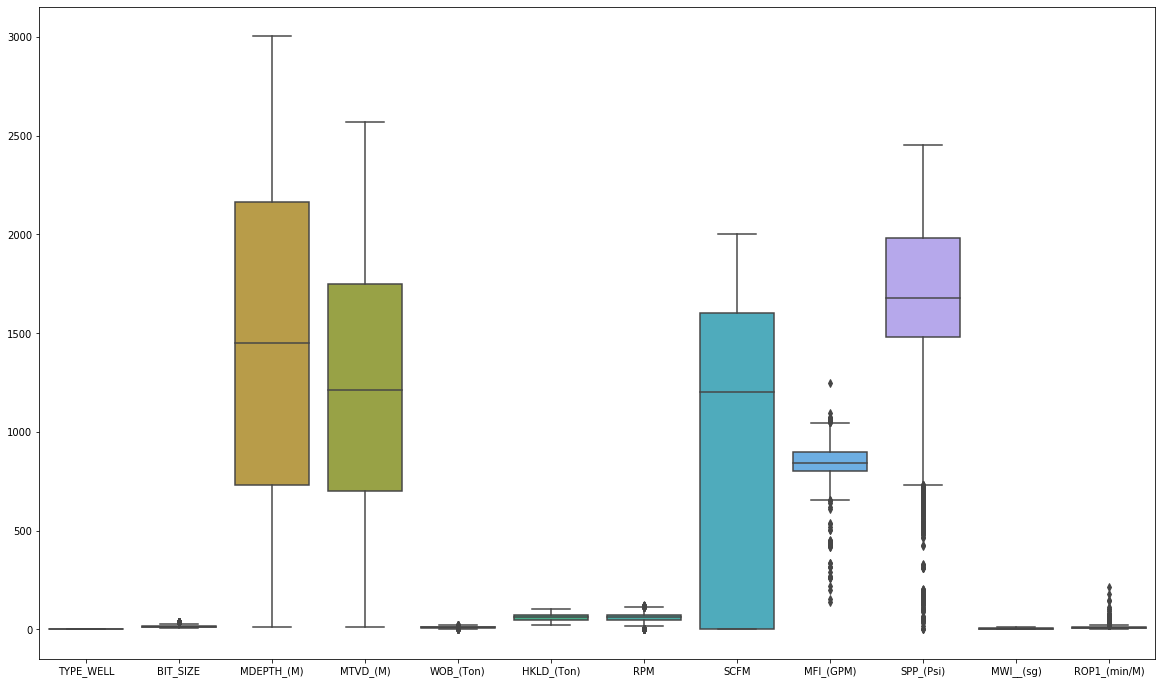

In [21]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df_clean)

In [22]:
# Z Outlier Detection for SCFM
upper = df_clean['SCFM'].mean() + 3*df_clean['SCFM'].std()
lower = df_clean['SCFM'].mean()- 3*df_clean['SCFM'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['SCFM']<upper) & (df_clean['SCFM']>lower)]

df_outlier['zscore'] = (df_outlier['SCFM'] - df_outlier['SCFM'].mean()) / df_outlier['SCFM'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
0,1,36.0,12,12,3,26,40,0,447,45,1,1,-1.419581
1,1,36.0,13,13,3,26,39,0,441,45,1,1,-1.419581
2,1,36.0,14,14,3,25,39,0,447,45,1,5,-1.419581
3,1,36.0,15,15,2,26,40,0,444,50,1,4,-1.419581
4,1,36.0,16,16,2,25,39,0,444,50,1,4,-1.419581


In [23]:
# Z Outlier Detection for MFI
upper = df_clean['MFI_(GPM)'].mean() + 3*df_clean['MFI_(GPM)'].std()
lower = df_clean['MFI_(GPM)'].mean()- 3*df_clean['MFI_(GPM)'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['MFI_(GPM)']<upper) & (df_clean['MFI_(GPM)']>lower)]

df_outlier['zscore'] = (df_outlier['MFI_(GPM)'] - df_outlier['MFI_(GPM)'].mean()) / df_outlier['MFI_(GPM)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
21,1,26.0,33,33,2,26,30,0,696,427,1,3,-2.194258
22,1,26.0,34,34,1,27,30,0,688,422,1,4,-2.310048
23,1,26.0,35,35,1,27,30,0,691,483,1,4,-2.266626
24,1,26.0,36,36,1,26,30,0,694,461,1,3,-2.223205
25,1,26.0,37,37,2,27,30,0,832,516,1,3,-0.225829


In [24]:
# Z Outlier Detection for SPP
upper = df_new['SPP_(Psi)'].mean() + 3*df_new['SPP_(Psi)'].std()
lower = df_new['SPP_(Psi)'].mean()- 3*df_new['SPP_(Psi)'].std()

#that were treated as outlier has been removed
df_outlier = df_new[(df_new['SPP_(Psi)']<upper) & (df_new['SPP_(Psi)']>lower)]

df_outlier['zscore'] = (df_outlier['SPP_(Psi)'] - df_outlier['SPP_(Psi)'].mean()) / df_outlier['SPP_(Psi)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
55,1,26.0,67,67,4,27,50,0,829,661,1,3,-2.911791
63,1,26.0,75,75,5,28,50,0,886,722,1,8,-2.739122
64,1,26.0,76,76,5,29,50,0,884,708,1,7,-2.778751
65,1,26.0,77,77,6,28,50,0,902,712,1,7,-2.767428
66,1,26.0,78,78,6,28,50,0,921,728,1,7,-2.722138


In [25]:
# Z Outlier Detection for WOB
upper = df_new['WOB_(Ton)'].mean() + 3*df_new['WOB_(Ton)'].std()
lower = df_new['WOB_(Ton)'].mean()- 3*df_new['WOB_(Ton)'].std()

#that were treated as outlier has been removed
df_outlier = df_new[(df_new['WOB_(Ton)']<upper) & (df_new['WOB_(Ton)']>lower)]

df_outlier['zscore'] = (df_outlier['WOB_(Ton)'] - df_outlier['WOB_(Ton)'].mean()) / df_outlier['WOB_(Ton)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
55,1,26.0,67,67,4,27,50,0,829,661,1,3,-1.806201
63,1,26.0,75,75,5,28,50,0,886,722,1,8,-1.528326
64,1,26.0,76,76,5,29,50,0,884,708,1,7,-1.528326
65,1,26.0,77,77,6,28,50,0,902,712,1,7,-1.250452
66,1,26.0,78,78,6,28,50,0,921,728,1,7,-1.250452


In [26]:
# Z Outlier Detection for RPM
upper = df_new['RPM'].mean() + 3*df_new['RPM'].std()
lower = df_new['RPM'].mean()- 3*df_new['RPM'].std()

#that were treated as outlier has been removed
df_outlier = df_new[(df_new['RPM']<upper) & (df_new['RPM']>lower)]

df_outlier['zscore'] = (df_outlier['RPM'] - df_outlier['RPM'].mean()) / df_outlier['RPM'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
55,1,26.0,67,67,4,27,50,0,829,661,1,3,-0.200492
63,1,26.0,75,75,5,28,50,0,886,722,1,8,-0.200492
64,1,26.0,76,76,5,29,50,0,884,708,1,7,-0.200492
65,1,26.0,77,77,6,28,50,0,902,712,1,7,-0.200492
66,1,26.0,78,78,6,28,50,0,921,728,1,7,-0.200492


In [27]:
df_new.describe()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
count,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8.441000e+03
mean,2.005568,14.198140,1474.195238,1246.918848,10.500059,61.242625,56.425660,1048.578367,847.936382,1694.785215,3.529321,8.534771,-1.312675e-14
std,0.833307,5.396833,824.708133,653.878648,3.598747,16.035975,32.049483,718.440908,68.443704,346.114404,3.456312,5.670975,1.000000e+00
min,1.000000,7.875000,34.000000,34.000000,0.000000,21.000000,0.000000,0.000000,647.000000,633.000000,1.000000,0.000000,-1.760579e+00
25%,1.000000,9.875000,762.000000,726.000000,8.000000,49.000000,50.000000,0.000000,801.000000,1494.000000,1.000000,5.000000,-2.004919e-01
50%,2.000000,12.250000,1467.000000,1223.000000,11.000000,61.000000,61.000000,1200.000000,845.000000,1686.000000,1.000000,7.000000,1.427274e-01
75%,3.000000,17.500000,2176.000000,1756.000000,13.000000,73.000000,74.000000,1600.000000,899.000000,1989.000000,8.000000,11.000000,5.483502e-01
max,3.000000,26.000000,3003.000000,2570.000000,21.000000,103.000000,125.000000,2000.000000,1053.000000,2450.000000,9.000000,102.000000,2.139639e+00


__Train Test Split__

In [28]:
df_train = df_new.drop(['zscore'], axis = 1)

In [29]:
df_train.columns

Index(['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)'],
      dtype='object')

In [30]:
# Features
X = df_train[['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)']].values

# Label
y = df_train['ROP1_(min/M)'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle = None)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [31]:
y_val

array([ 4,  4, 11, ..., 10, 10,  1], dtype=int64)

In [32]:
y_test.shape

(2533,)

In [33]:
y_train.shape

(5908,)

### Normalize All Columns
0-1

In [34]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

print((X_train.shape), 
      (X_test.shape),
      (X_val.shape))

(5908, 11) (2533, 11) (1182, 11)


In [35]:
X = pd.DataFrame(X_train)

X

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.000000,0.008420,0.009858,0.238095,0.024390,0.466667,0.000,0.486284,0.024377,0.875
1,0.5,0.000000,0.762883,0.655363,0.523810,0.573171,0.608333,0.850,0.394015,0.775623,0.000
2,0.0,0.241379,0.650724,0.625789,0.190476,0.658537,0.583333,0.600,0.334165,0.763435,0.000
3,0.5,0.110345,0.413607,0.401420,0.476190,0.402439,0.400000,0.400,0.648379,0.457064,0.000
4,0.5,0.241379,0.322668,0.340300,0.238095,0.426829,0.500000,0.925,0.074813,0.390582,0.000
...,...,...,...,...,...,...,...,...,...,...,...
5903,0.5,0.531034,0.188616,0.215300,0.333333,0.365854,0.000000,0.800,0.244389,0.217729,0.000
5904,0.0,0.110345,0.737959,0.706625,0.619048,0.682927,0.500000,0.500,0.201995,0.884211,0.000
5905,0.0,0.241379,0.476591,0.472792,0.285714,0.402439,0.500000,0.300,0.197007,0.506925,0.000
5906,0.5,0.110345,0.574267,0.497634,0.476190,0.500000,0.608333,0.900,0.668329,0.654848,0.000


# Pembentukan Model

Pencarian Grid & Pembangunan JST-PB

* Hidden Neurons: 60
* Optimization : Adam
* Fungsi Aktivasi: RLU

__Tuning The Parameter: Grid Search__

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

__16 MENIT__

In [54]:
#PENCARIAN OPTIMIZER 1000 epoch -DATA VALIDASI DI NORMALISASI
def build_ann(neurons1 = 1, neurons2 = 1):
    model = Sequential()
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(neurons1, activation = 'tanh'))
    model.add(Dense(neurons2, activation = 'tanh'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
    return model

#create model
model = KerasClassifier(build_fn=build_ann)

#define the grid search
neurons1 = [3, 15, 20, 25 ,30, 35, 40, 45, 50, 55, 60]
neurons2 = [3, 15, 20, 25 ,30, 35, 40, 45, 50, 55, 60]

param_grid = dict(neurons1=neurons1, neurons2=neurons2)

grid_search = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=3)
grid_result=grid_search.fit(X_val, y_val)

grid_scores = grid_result.cv_results_
results_df = pd.DataFrame(grid_scores)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

25/25 [==============================] - 0s 2ms/step - loss: 49.0007 - accuracy: 0.0190


25/25 [==============================] - 0s 1ms/step - loss: 54.2388 - accuracy: 0.0190


37/37 [==============================] - 0s 1ms/step - loss: 65.3462 - accuracy: 0.0178


,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
35_35,"{'neurons1': 35, 'neurons2': 35}",1,0.025381,0.010362
45_40,"{'neurons1': 45, 'neurons2': 40}",1,0.025381,0.010362
45_35,"{'neurons1': 45, 'neurons2': 35}",1,0.025381,0.010362
45_20,"{'neurons1': 45, 'neurons2': 20}",1,0.025381,0.010362
40_60,"{'neurons1': 40, 'neurons2': 60}",1,0.025381,0.010362
...,...,...,...,...
45_25,"{'neurons1': 45, 'neurons2': 25}",101,0.013536,0.009345
3_15,"{'neurons1': 3, 'neurons2': 15}",118,0.011844,0.009793
40_45,"{'neurons1': 40, 'neurons2': 45}",119,0.010998,0.010223


In [55]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')

#save ke csv
results_df.to_csv('tuning_neuron_2layers_2.csv', header = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_neurons1', 'param_neurons2', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'], index = False)

### Building BP-NN
* neuron: 55-55

In [48]:
opt = RMSprop(learning_rate=0.001)

model = keras.Sequential()
model.add(layers.Dense(11,activation = 'relu', name="layer1"))
model.add(layers.Dense(55,activation = 'tanh', name="layer2"))
model.add(layers.Dense(55,activation = 'tanh', name="layer3"))
model.add(layers.Dense(1,activation = 'relu', name="layer4"))

model.compile(optimizer = opt, loss = 'mse')

#fit model to the training data
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test),
          batch_size= 25)

Epoch 1/500
237/237 [==============================] - 0s 1ms/step - loss: 35.7117 - val_loss: 28.5686
Epoch 2/500
237/237 [==============================] - 0s 1ms/step - loss: 30.0285 - val_loss: 26.0486
Epoch 3/500
237/237 [==============================] - 0s 1ms/step - loss: 27.3595 - val_loss: 24.1778
Epoch 4/500
237/237 [==============================] - 0s 1ms/step - loss: 25.8784 - val_loss: 23.2196
Epoch 5/500
237/237 [==============================] - 0s 1ms/step - loss: 25.1909 - val_loss: 22.5977
Epoch 6/500
237/237 [==============================] - 0s 1ms/step - loss: 24.6395 - val_loss: 22.1240
Epoch 7/500
237/237 [==============================] - 0s 1ms/step - loss: 24.1851 - val_loss: 22.1740
Epoch 8/500
237/237 [==============================] - 0s 1ms/step - loss: 23.8720 - val_loss: 21.7072
Epoch 9/500
237/237 [==============================] - 0s 1ms/step - loss: 23.6090 - val_loss: 23.7429
Epoch 10/500
237/237 [==============================] - 0s 1ms/step - los

237/237 [==============================] - 0s 1ms/step - loss: 16.6975 - val_loss: 16.1945
Epoch 157/500
237/237 [==============================] - 0s 890us/step - loss: 16.4516 - val_loss: 15.8655
Epoch 158/500
237/237 [==============================] - 0s 1ms/step - loss: 16.5127 - val_loss: 15.8281
Epoch 159/500
237/237 [==============================] - 0s 870us/step - loss: 16.3600 - val_loss: 15.9635
Epoch 160/500
237/237 [==============================] - 0s 946us/step - loss: 16.6129 - val_loss: 16.1228
Epoch 161/500
237/237 [==============================] - 0s 910us/step - loss: 16.5790 - val_loss: 16.1482
Epoch 162/500
237/237 [==============================] - 0s 863us/step - loss: 16.4352 - val_loss: 15.8516
Epoch 163/500
237/237 [==============================] - 0s 1ms/step - loss: 16.4001 - val_loss: 17.6436
Epoch 164/500
237/237 [==============================] - 0s 1ms/step - loss: 16.4235 - val_loss: 16.4189
Epoch 165/500
237/237 [==============================] - 0s

237/237 [==============================] - 0s 959us/step - loss: 14.3590 - val_loss: 14.3216
Epoch 311/500
237/237 [==============================] - 0s 875us/step - loss: 14.0679 - val_loss: 14.4937
Epoch 312/500
237/237 [==============================] - 0s 916us/step - loss: 14.0444 - val_loss: 14.5023
Epoch 313/500
237/237 [==============================] - 0s 858us/step - loss: 14.1953 - val_loss: 14.1622
Epoch 314/500
237/237 [==============================] - 0s 956us/step - loss: 14.1973 - val_loss: 14.5183
Epoch 315/500
237/237 [==============================] - 0s 804us/step - loss: 14.0854 - val_loss: 15.0668
Epoch 316/500
237/237 [==============================] - 0s 864us/step - loss: 14.1696 - val_loss: 14.9349
Epoch 317/500
237/237 [==============================] - 0s 1ms/step - loss: 14.2996 - val_loss: 14.3694
Epoch 318/500
237/237 [==============================] - 0s 907us/step - loss: 14.1442 - val_loss: 14.5689
Epoch 319/500
237/237 [==============================

237/237 [==============================] - 0s 941us/step - loss: 13.2536 - val_loss: 14.8918
Epoch 388/500
237/237 [==============================] - 0s 1ms/step - loss: 13.3777 - val_loss: 15.0796
Epoch 389/500
237/237 [==============================] - 0s 1ms/step - loss: 13.3776 - val_loss: 14.7012
Epoch 390/500
237/237 [==============================] - 0s 1ms/step - loss: 13.2134 - val_loss: 14.4999
Epoch 391/500
237/237 [==============================] - 0s 981us/step - loss: 13.2988 - val_loss: 14.4412
Epoch 392/500
237/237 [==============================] - 0s 947us/step - loss: 13.2929 - val_loss: 14.4120
Epoch 393/500
237/237 [==============================] - 0s 1ms/step - loss: 13.4348 - val_loss: 14.5517
Epoch 394/500
237/237 [==============================] - 0s 1ms/step - loss: 13.2982 - val_loss: 14.5386
Epoch 395/500
237/237 [==============================] - 0s 1ms/step - loss: 13.3861 - val_loss: 14.6540
Epoch 396/500
237/237 [==============================] - 0s 1ms

237/237 [==============================] - 1s 3ms/step - loss: 12.7495 - val_loss: 14.7231
Epoch 466/500
237/237 [==============================] - 1s 3ms/step - loss: 12.7861 - val_loss: 14.5620
Epoch 467/500
237/237 [==============================] - 1s 3ms/step - loss: 12.7071 - val_loss: 14.4517
Epoch 468/500
237/237 [==============================] - 1s 2ms/step - loss: 12.7153 - val_loss: 14.4305
Epoch 469/500
237/237 [==============================] - 1s 2ms/step - loss: 12.6351 - val_loss: 14.3209
Epoch 470/500
237/237 [==============================] - 1s 3ms/step - loss: 12.8532 - val_loss: 14.2799
Epoch 471/500
237/237 [==============================] - 1s 2ms/step - loss: 12.8112 - val_loss: 14.6418
Epoch 472/500
237/237 [==============================] - 1s 3ms/step - loss: 12.7995 - val_loss: 15.7984
Epoch 473/500
237/237 [==============================] - 1s 2ms/step - loss: 12.6302 - val_loss: 14.4584
Epoch 474/500
237/237 [==============================] - 1s 2ms/step 

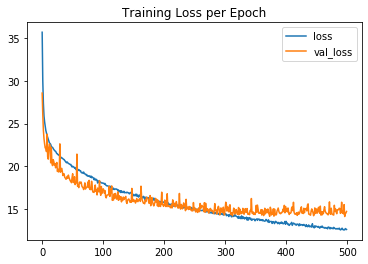

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Training Loss per Epoch");

In [50]:
X_test.shape

(2533, 11)

In [51]:
#true value of TEST
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(2533,))
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions_Test']
pred_df

,Test Y,Model Predictions_Test
0,7,6.665367
1,12,11.289953
2,12,10.677202
3,10,6.195859
4,4,3.802378
...,...,...
2528,13,10.981138
2529,3,5.905457
2530,7,8.348305
2531,8,8.916136


In [52]:
pred_df['Model Predictions_Test'] = pred_df['Model Predictions_Test'].astype('int64')

### Evaluation Model

In [53]:
y_true = pred_df['Test Y']
y_pred = pred_df['Model Predictions_Test']

#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(np.array(y_true), np.array(y_pred))

#RMSE
mse = sklearn.metrics.mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)

#R2 SCORE
r2 = r2_score(y_true, y_pred)


print("MAPE: " + str(mape) + (' %'))
print("RMSE: " + str(rmse))
print("R2 SCORE: " + str(r2))

MAPE: inf %
RMSE: 3.939585209458214
R2 SCORE: 0.4880273304415893


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


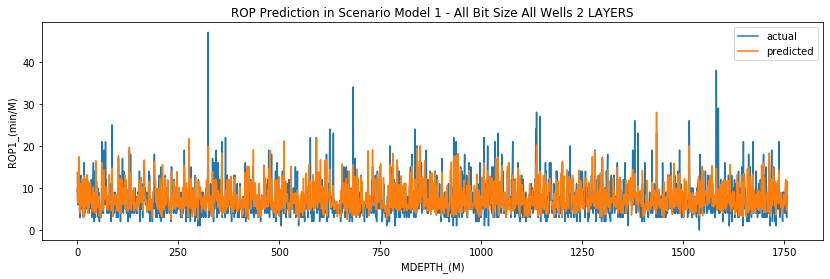

In [150]:
#Grafik perbandingan Prediksi dengan Aktual
plt.figure(figsize = (14,4))
line_chart1 = plt.plot(y_true)
line_chart2 = plt.plot(y_pred)
plt.title('ROP Prediction in Scenario Model 1 - All Bit Size All Wells 2 LAYERS')
plt.xlabel('Index (Unit Time)')
plt.ylabel('ROP1_(min/M)')
plt.legend(['actual', 'predicted'], loc=1)
plt.show()

In [174]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')
os.getcwd()
#save ke csv
pred_df.to_csv('prediksi_rop_ann_test_2LAYERS_allwells.csv', header = ['Test Y','Model Predictions_Test'], index = False)

In [165]:
df_output['rop_pred'] = df_output['rop_pred'].astype('int64')

In [166]:
df_output.columns

Index(['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)', 'rop_pred'],
      dtype='object')

### Save and Load the Model ANN

In [125]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')
os.getcwd()

'C:\\Users\\Anisa Gemelia\\Documents\\Dokumen Kuliah\\Tugas Akhir\\Output'

In [126]:
#save ke csv
df_output.to_csv('prediksi_rop_ann_2layers_complete.csv', header = ['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)', 'rop_pred'], index = False)

In [146]:
#save model into pkl file
from tensorflow.keras.models import load_model
model.save('model_ann_2layers.h5')  # creates a HDF5 file 'my_model.h5'